In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os, sys
path = os.getcwd()
while not path.endswith('research'):    
    path = os.path.abspath(os.path.join(path, '../'))
sys.path.append(path)

***

In [3]:
#a number of gas analytics utilities:
from gmt.fom.gas.shared.utils.common import print_attributes as pa
from gmt.fom.gas.shared.utils.common import display_full_df as ddff
from gmt.fom.gas.shared.utils.common import flatten_lst

In [4]:
#gas aligned mongo db
from gmt.fom.gas.shared.utils.mongo import GasMongo

In [5]:
import logging
logging.getLogger().setLevel(logging.INFO)

***

In [6]:
import os, sys
import numpy as np

from datetime import datetime, date

In [7]:
import pandas as pd

In [8]:
import matplotlib.pyplot as plt

In [9]:
import statsmodels.api as sm

# Folders

In [10]:
folder_data = os.path.join(os.getcwd(), 'data'); folder_data

'C:\\git\\gmt-fom-gas-research\\sandbox\\alexs\\python_workshop\\modelling_in_python\\data'

In [11]:
folder_results = os.path.join(os.getcwd(), 'results'); folder_results

'C:\\git\\gmt-fom-gas-research\\sandbox\\alexs\\python_workshop\\modelling_in_python\\results'

# Data

In [12]:
df_google = pd.read_csv(os.path.join(folder_data, 'google.csv')); df_google.head()

day ticker   name  ccy   indx         open         high  \
0  2021-01-05  GOOGL  GOOGL  USD  SP500  1725.089966  1746.829956   
1  2021-01-04  GOOGL  GOOGL  USD  SP500  1760.000000  1762.489990   
2  2020-12-31  GOOGL  GOOGL  USD  SP500  1737.270020  1757.500000   
3  2020-12-30  GOOGL  GOOGL  USD  SP500  1765.000000  1767.760010   
4  2020-12-29  GOOGL  GOOGL  USD  SP500  1787.229980  1788.469971   

           low        close     volume   closeunadj  
0  1716.900024  1740.050049  1015942.0  1740.050049  
1  1707.140015  1726.130005  1866195.0  1726.130005  
2  1736.089966  1752.640015  1053479.0  1752.640015  
3  1728.000000  1736.250000  1051308.0  1736.250000  
4  1755.109985  1757.760010   982077.0  1757.760010

In [13]:
df_sp500 = pd.read_csv(os.path.join(folder_data, 'sp500_index.csv')); df_sp500.head()

day      ticker        name  ccy   indx         open  high  low  \
0  2020-10-12  SP500Index  SP500Index  USD  SP500  3534.219971   NaN  NaN   
1  2020-10-09  SP500Index  SP500Index  USD  SP500  3477.129883   NaN  NaN   
2  2020-10-08  SP500Index  SP500Index  USD  SP500  3446.830078   NaN  NaN   
3  2020-10-07  SP500Index  SP500Index  USD  SP500  3419.449951   NaN  NaN   
4  2020-10-06  SP500Index  SP500Index  USD  SP500  3360.949951   NaN  NaN   

         close  volume  closeunadj  
0  3534.219971     NaN         NaN  
1  3477.129883     NaN         NaN  
2  3446.830078     NaN         NaN  
3  3419.449951     NaN         NaN  
4  3360.949951     NaN         NaN

# Exploratory Analysis

In [14]:
# we see that day is 'object' - we need to convert to datetime
df_google.dtypes.to_frame();

**`pd.to_datetime()`**

In [15]:
df_google['day'] = pd.to_datetime(df_google['day'])

df_google.head(1)

day ticker   name  ccy   indx         open         high          low  \
0 2021-01-05  GOOGL  GOOGL  USD  SP500  1725.089966  1746.829956  1716.900024   

         close     volume   closeunadj  
0  1740.050049  1015942.0  1740.050049

In [16]:
df_sp500['day'] = pd.to_datetime(df_sp500['day'])

df_sp500.head(1)

day      ticker        name  ccy   indx         open  high  low  \
0 2020-10-12  SP500Index  SP500Index  USD  SP500  3534.219971   NaN  NaN   

         close  volume  closeunadj  
0  3534.219971     NaN         NaN

**`describe()`**

In [17]:
df_google.describe().style.format('{:.2f}')

**let's day column to be index of the dataFrame**

In [18]:
df_google.set_index('day', inplace=True)
df_sp500.set_index('day', inplace=True)

**plots**

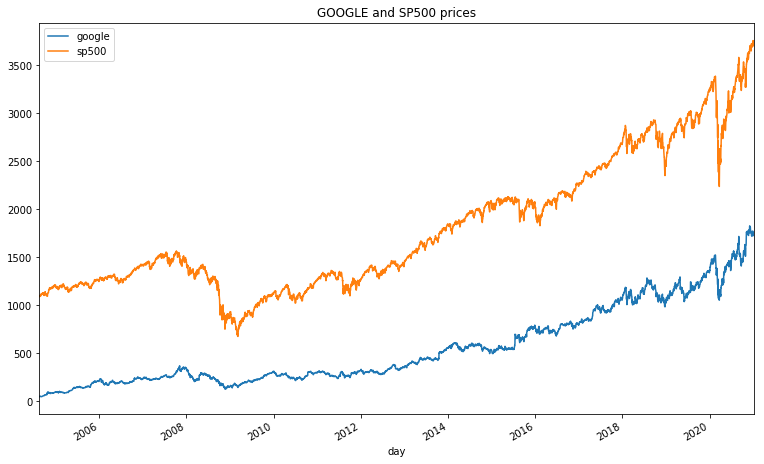

In [19]:
fig, ax = plt.subplots()
df_google['close'].plot(figsize=(8*1.6,8), ax=ax, label='google')

# df_sp500['close'].plot(figsize=(8*1.6,8), ax=ax, label='sp500')

##----------------------- ALIGN TIME SERIES -------------------------- ##
idx = df_google.index
df_sp500.loc[idx]['close'].plot(figsize=(8*1.6,8), ax=ax, label='sp500')
#-----------------------------------------------------------------------#

ax.set_title('GOOGLE and SP500 prices')
ax.legend()
plt.show()

# Stationarity and Transformations

In [20]:
google_close = df_google['close']

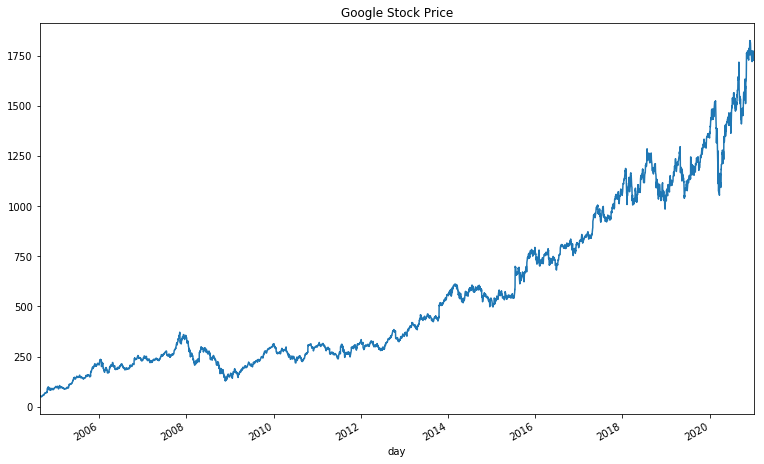

In [21]:
df_google['close'].plot(figsize=(8*1.6,8), title='Google Stock Price')

**Sample Autocorrelation | Partial autocorrelation functions**

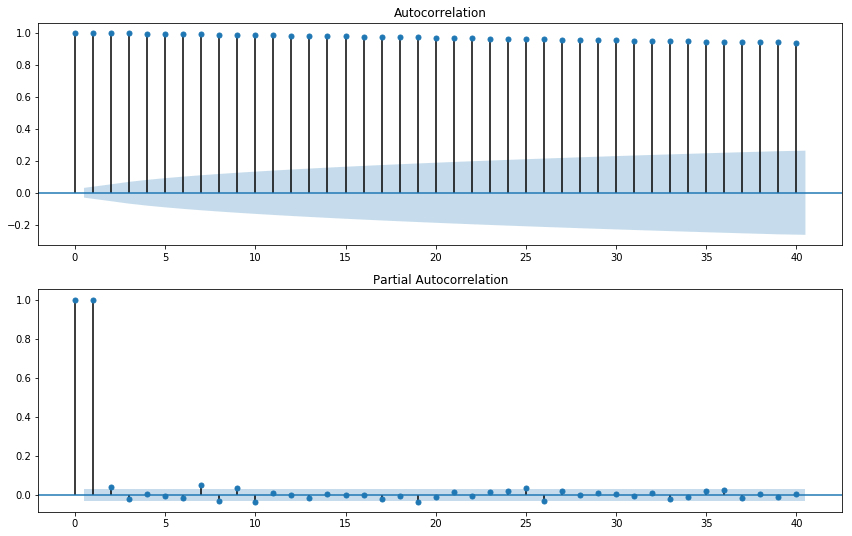

In [36]:
fig = plt.figure(figsize=(9*1.6,9))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(google_close, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(google_close, lags=40, ax=ax2)

*the time series is clearly non-stationary, so we need to transform to obtain (weakly) stationarity*

**seasonality**

# Modelling

trend-stationarity:  
- you try to regress on time
- subtract trend --> work with residuals $\hat{y}_t = x_t - \hat{\mu_t}$, where $\mu_t$ - trend
- include lagged variables



transformations:
    - difference
    - regression with lagged variables
    - with dummies

*pre-whitening cross-correlation*

*scatter plot matrix*

seasonality

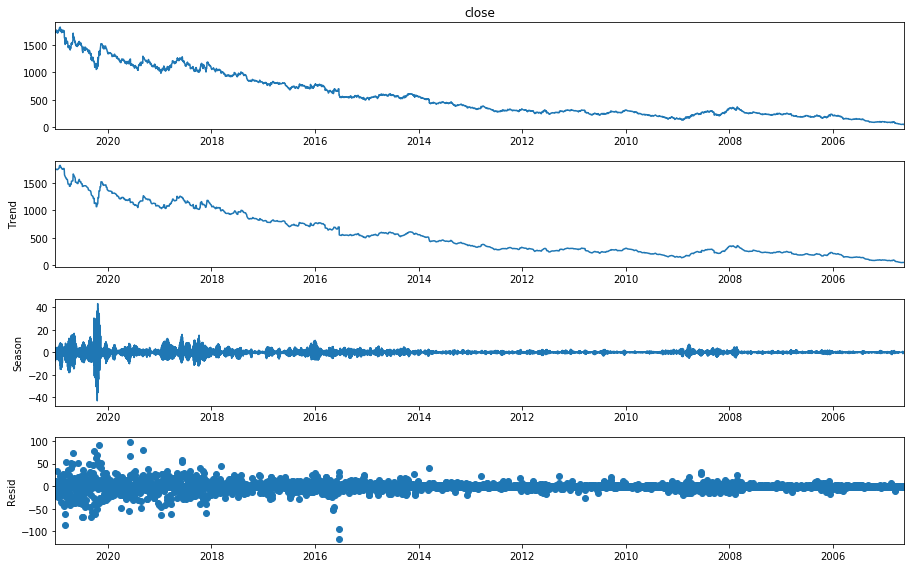

In [70]:
import matplotlib as mpl
with mpl.rc_context():
    mpl.rc("figure", figsize=(8*1.6,8))
    stl = STL(google_close, period=3, robust=True)
    res = stl.fit()
    fig = res.plot()

* seasonal-stationary

Trends can result in a varying mean over time, whereas seasonality can result in a changing variance over time, both which define a time series as being non-stationary. Stationary datasets are those that have a stable mean and variance, and are in turn much easier to model.

https://machinelearningmastery.com/remove-trends-seasonality-difference-transform-python/

difference to remove seasonality

In [ ]:
When looking at relationships between two variables which are time series, seasonality will reduce the degrees of freedom because the data will not be independent. This "serial" correlation will result in spurious correlations. Thus the seasonality is removed with the goal of increasing the degrees of freedom.

In [ ]:
Average de-trended values.
Differencing a time-series.
Use the loess method.

In [73]:
from statsmodels.tsa.seasonal import seasonal_decompose

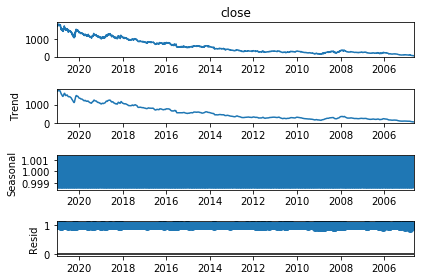

In [76]:
decompose_result = seasonal_decompose(google_close, model="multiplicative", period=12)

trend = decompose_result.trend
seasonal = decompose_result.seasonal
residual = decompose_result.resid

decompose_result.plot();

rolling means

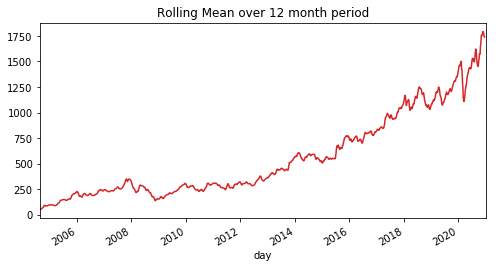

In [77]:
google_close.rolling(window = 12).mean().plot(figsize=(8,4), color="tab:red", title="Rolling Mean over 12 month period");

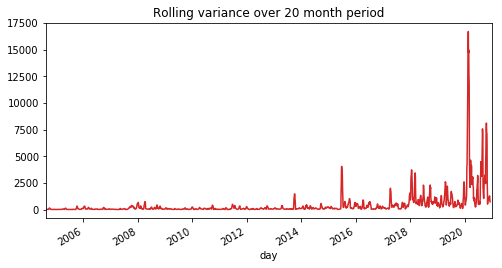

In [78]:
google_close.rolling(window = 20).var().plot(figsize=(8,4), color="tab:red", title="Rolling variance over 20 month period");


https://coderzcolumn.com/tutorials/data-science/how-to-remove-trend-and-seasonality-from-time-series-data-using-python-pandas

In [ ]:
Differencing Over Log Transformed Time-Series